In [7]:
import pandas as pd

import os
import sys
import rdkit
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..", "..", "b3db_kc")))
from utils import chembl_parent_from_smiles
 
df = pd.read_csv("dataset.csv")


[11:18:33] Initializing Normalizer


In [19]:

df["mol"] = df.NAME.apply(rdkit.Chem.MolFromSmiles)
df["parent_smiles"] = df.NAME.apply(lambda x: chembl_parent_from_smiles(x)[0])

In [20]:
df.parent_smiles.nunique()

959

In [32]:
len(df_b3db_kc[pd.notna(df_b3db_kc.logBB)])

947

In [37]:
df_b3db_kc = pd.read_csv("../../b3db_kc/b3db_kc_raw.tsv", sep="\t")
df_b3db_kc[pd.notna(df_b3db_kc.logBB)]


FileNotFoundError: [Errno 2] No such file or directory: '../../b3db_kc/b3db_kc_raw.tsv'

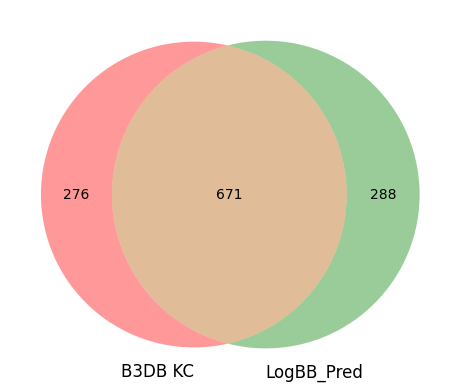

In [33]:
import matplotlib_venn
matplotlib_venn.venn2([set(df_b3db_kc[pd.notna(df_b3db_kc.logBB)].smiles), set(df["parent_smiles"])], ["B3DB KC", "LogBB_Pred"])